<a href="https://colab.research.google.com/github/Carbon1120000/Machine-Learning/blob/main/Regression_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1717]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set()
np.set_printoptions(precision=4, suppress=True)

In [1718]:
df_raw = pd.read_csv('/content/data/car_data_v4.csv')
df = df_raw.copy()
df_raw.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [1719]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [1720]:
df[df.duplicated()]

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity


In [1721]:
df['Engine'] = df['Engine'].astype(str).str.replace(' cc', '').astype(float)
df = df.rename(columns={'Engine': 'Engine[cc]'})

df['Max Power'] = df['Max Power'].str.extract(r'(\d+)').astype(float)

df['Max Torque'] = df['Max Torque'].str.extract(r'(\d+)').astype(float)

In [1722]:
df.head()


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine[cc],Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,87.0,109.0,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,74.0,190.0,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,79.0,112.0,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,82.0,113.0,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,148.0,343.0,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [1723]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['Make',
 'Model',
 'Fuel Type',
 'Transmission',
 'Location',
 'Color',
 'Owner',
 'Seller Type',
 'Drivetrain']

In [1724]:
df[cat_cols] = df[cat_cols].apply(lambda col: col.astype('category'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Make                2059 non-null   category
 1   Model               2059 non-null   category
 2   Price               2059 non-null   int64   
 3   Year                2059 non-null   int64   
 4   Kilometer           2059 non-null   int64   
 5   Fuel Type           2059 non-null   category
 6   Transmission        2059 non-null   category
 7   Location            2059 non-null   category
 8   Color               2059 non-null   category
 9   Owner               2059 non-null   category
 10  Seller Type         2059 non-null   category
 11  Engine[cc]          1979 non-null   float64 
 12  Max Power           1979 non-null   float64 
 13  Max Torque          1979 non-null   float64 
 14  Drivetrain          1923 non-null   category
 15  Length              1995 non-null   fl

In [1725]:
df.describe(include=['category']).T

,count,unique,top,freq
Make,2059,33,Maruti Suzuki,440
Model,2059,1050,X1 sDrive20d xLine,15
Fuel Type,2059,9,Diesel,1049
Transmission,2059,2,Manual,1133
Location,2059,77,Mumbai,342
Color,2059,17,White,802
Owner,2059,6,First,1619
Seller Type,2059,3,Individual,1997
Drivetrain,1923,3,FWD,1330


In [1726]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine[cc]             80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [1727]:
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage = missing_percentage.sort_values(ascending=False).round(2)
print(missing_percentage)

Drivetrain            6.61
Fuel Tank Capacity    5.49
Engine[cc]            3.89
Max Power             3.89
Max Torque            3.89
Length                3.11
Width                 3.11
Height                3.11
Seating Capacity      3.11
dtype: float64


In [1728]:
print(df['Drivetrain'].describe())

count     1923
unique       3
top        FWD
freq      1330
Name: Drivetrain, dtype: object


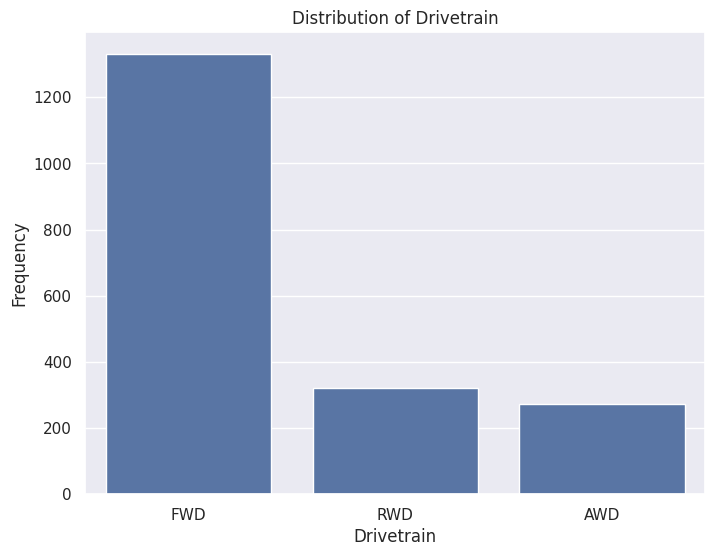

In [1729]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Drivetrain', data=df, order=df['Drivetrain'].value_counts().index)
plt.title('Distribution of Drivetrain')
plt.xlabel('Drivetrain')
plt.ylabel('Frequency')
plt.show()

In [1730]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[['Drivetrain']])

SimpleImputer(strategy='most_frequent')

In [1731]:
imputer.statistics_

array(['FWD'], dtype=object)

In [1732]:
imputer.transform(df[['Drivetrain']])
df['Drivetrain'] = imputer.transform(df[['Drivetrain']]).flatten()
df['Drivetrain'] = df['Drivetrain'].astype('category')

In [1733]:
print(df['Fuel Tank Capacity'].describe())

count    1946.000000
mean       52.002210
std        15.110198
min        15.000000
25%        41.250000
50%        50.000000
75%        60.000000
max       105.000000
Name: Fuel Tank Capacity, dtype: float64


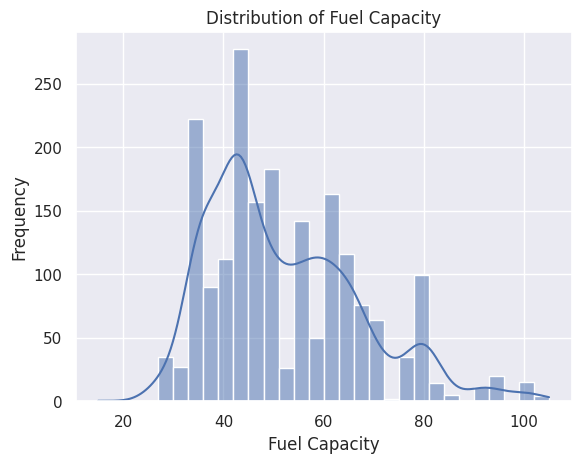

In [1734]:
sns.histplot(df['Fuel Tank Capacity'].dropna(), kde=True)
plt.title('Distribution of Fuel Capacity')
plt.xlabel('Fuel Capacity')
plt.ylabel('Frequency')
plt.show()

In [1735]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['Fuel Tank Capacity']])

SimpleImputer()

In [1736]:
imputer.statistics_

array([52.0022])

In [1737]:
imputer.transform(df[['Fuel Tank Capacity']])
df['Fuel Tank Capacity'] = imputer.transform(df[['Fuel Tank Capacity']])

In [1738]:
print(df['Engine[cc]'].describe())

count    1979.000000
mean     1692.575543
std       643.736294
min       624.000000
25%      1197.000000
50%      1498.000000
75%      1995.000000
max      6592.000000
Name: Engine[cc], dtype: float64


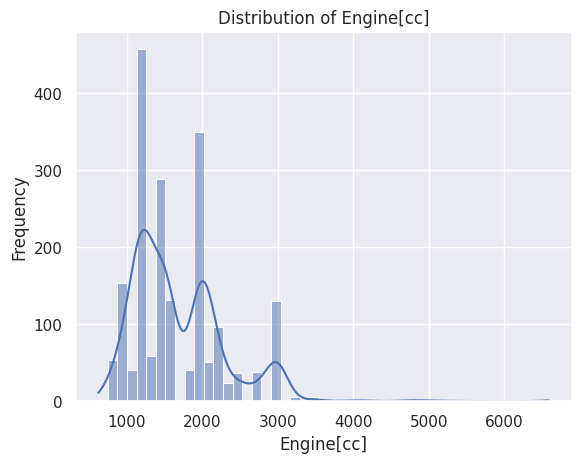

In [1739]:
sns.histplot(df['Engine[cc]'].dropna(), kde=True)
plt.title('Distribution of Engine[cc]')
plt.xlabel('Engine[cc]')
plt.ylabel('Frequency')
plt.show()

In [1740]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df[['Engine[cc]']])

SimpleImputer(strategy='median')

In [1741]:
imputer.statistics_

array([1498.])

In [1742]:
imputer.transform(df[['Engine[cc]']])
df['Engine[cc]'] = imputer.transform(df[['Engine[cc]']])

In [1743]:
print(df['Max Power'].describe())

count    1979.000000
mean      129.611420
std        65.074136
min        35.000000
25%        83.000000
50%       116.000000
75%       171.000000
max       660.000000
Name: Max Power, dtype: float64


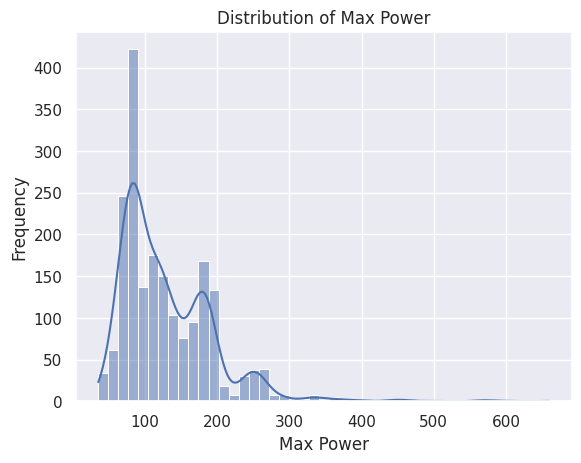

In [1744]:
sns.histplot(df['Max Power'].dropna(), kde=True)
plt.title('Distribution of Max Power')
plt.xlabel('Max Power')
plt.ylabel('Frequency')
plt.show()

In [1745]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df[['Max Power']])

SimpleImputer(strategy='median')

In [1746]:
imputer.statistics_

array([116.])

In [1747]:
imputer.transform(df[['Max Power']])
df['Max Power'] = imputer.transform(df[['Max Power']])

In [1748]:
print(df['Max Torque'].describe())

count    1979.000000
mean      245.841334
std       140.473819
min        48.000000
25%       115.000000
50%       200.000000
75%       350.000000
max       780.000000
Name: Max Torque, dtype: float64


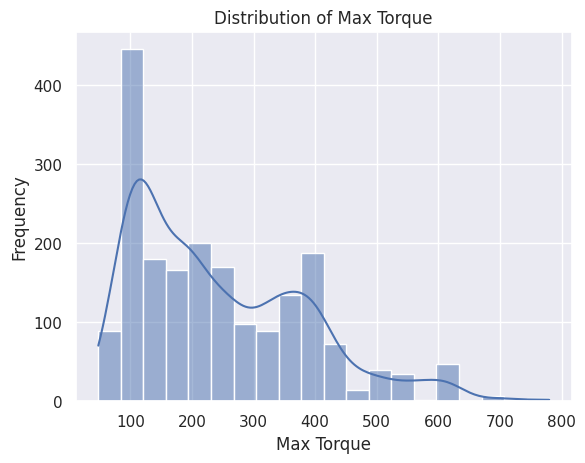

In [1749]:
sns.histplot(df['Max Torque'].dropna(), kde=True)
plt.title('Distribution of Max Torque')
plt.xlabel('Max Torque')
plt.ylabel('Frequency')
plt.show()

In [1750]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df[['Max Torque']])

SimpleImputer(strategy='median')

In [1751]:
imputer.statistics_

array([200.])

In [1752]:
imputer.transform(df[['Max Torque']])
df['Max Torque'] = imputer.transform(df[['Max Torque']])

In [1753]:
print(df['Length'].describe())

count    1995.000000
mean     4280.860652
std       442.458507
min      3099.000000
25%      3985.000000
50%      4370.000000
75%      4629.000000
max      5569.000000
Name: Length, dtype: float64


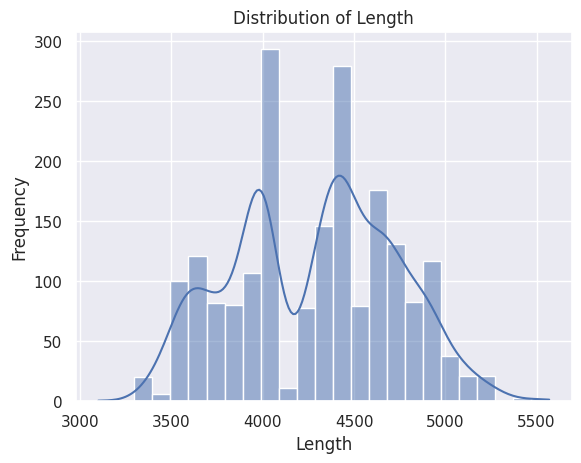

In [1754]:
sns.histplot(df['Length'].dropna(), kde=True)
plt.title('Distribution of Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [1755]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['Length']])

SimpleImputer()

In [1756]:
imputer.statistics_

array([4280.8607])

In [1757]:
imputer.transform(df[['Length']])
df['Length'] = imputer.transform(df[['Length']])

In [1758]:
print(df['Width'].describe())

count    1995.000000
mean     1767.991980
std       135.265825
min      1475.000000
25%      1695.000000
50%      1770.000000
75%      1831.500000
max      2220.000000
Name: Width, dtype: float64


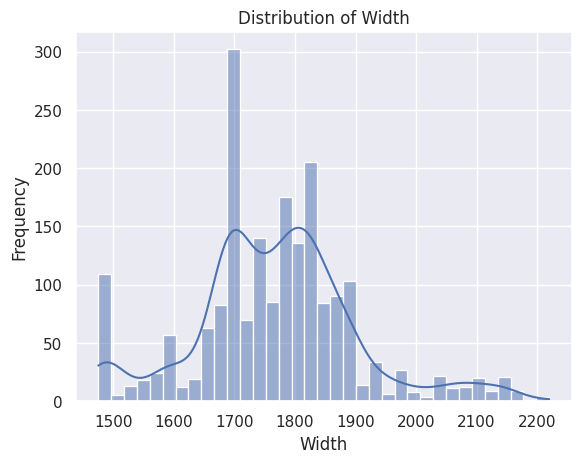

In [1759]:
sns.histplot(df['Width'].dropna(), kde=True)
plt.title('Distribution of Width')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()

In [1760]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['Width']])

SimpleImputer()

In [1761]:
imputer.statistics_

array([1767.992])

In [1762]:
imputer.transform(df[['Width']])
df['Width'] = imputer.transform(df[['Width']])

In [1763]:
print(df['Length'].describe())

count    2059.000000
mean     4280.860652
std       435.524350
min      3099.000000
25%      3986.000000
50%      4315.000000
75%      4620.000000
max      5569.000000
Name: Length, dtype: float64


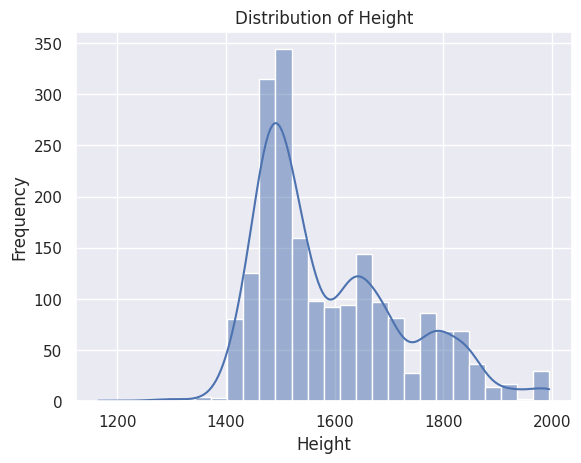

In [1764]:
sns.histplot(df['Height'].dropna(), kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [1765]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['Height']])

SimpleImputer()

In [1766]:
imputer.statistics_

array([1591.7353])

In [1767]:
imputer.transform(df[['Height']])
df['Height'] = imputer.transform(df[['Height']])

In [1768]:
print(df['Seating Capacity'].describe())

count    1995.000000
mean        5.306266
std         0.822170
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         8.000000
Name: Seating Capacity, dtype: float64


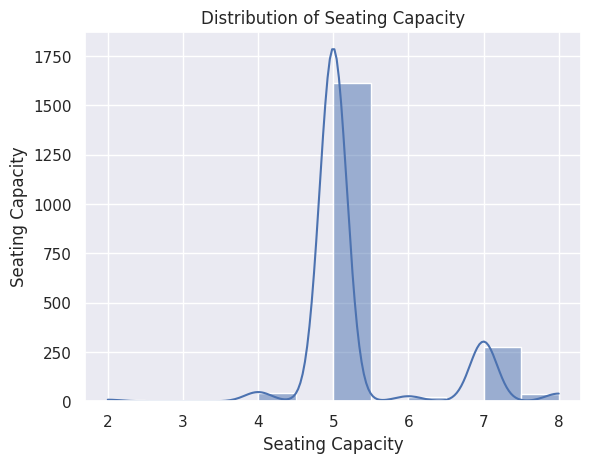

In [1769]:
sns.histplot(df['Seating Capacity'].dropna(), kde=True)
plt.title('Distribution of Seating Capacity')
plt.xlabel('Seating Capacity')
plt.ylabel('Seating Capacity')
plt.show()

In [1770]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['Seating Capacity']])

SimpleImputer()

In [1771]:
imputer.statistics_

array([5.3063])

In [1772]:
imputer.transform(df[['Seating Capacity']])
df['Seating Capacity'] = imputer.transform(df[['Seating Capacity']])

In [1773]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine[cc]            0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [1774]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Make                2059 non-null   category
 1   Model               2059 non-null   category
 2   Price               2059 non-null   int64   
 3   Year                2059 non-null   int64   
 4   Kilometer           2059 non-null   int64   
 5   Fuel Type           2059 non-null   category
 6   Transmission        2059 non-null   category
 7   Location            2059 non-null   category
 8   Color               2059 non-null   category
 9   Owner               2059 non-null   category
 10  Seller Type         2059 non-null   category
 11  Engine[cc]          2059 non-null   float64 
 12  Max Power           2059 non-null   float64 
 13  Max Torque          2059 non-null   float64 
 14  Drivetrain          2059 non-null   category
 15  Length              2059 non-null   fl

In [1775]:
df = df.drop(columns=['Model'])
df = df.drop(columns=['Location'])

In [1776]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies

,Price,Year,Kilometer,Engine[cc],Max Power,Max Torque,Length,Width,Height,Seating Capacity,...,Color_Yellow,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD
0,505000,2017,87150,1198.0,87.0,109.0,3990.0,1680.0,1505.0,5.0,...,False,True,False,False,False,False,True,False,True,False
1,450000,2014,75000,1248.0,74.0,190.0,3995.0,1695.0,1555.0,5.0,...,False,False,False,True,False,False,False,True,True,False
2,220000,2011,67000,1197.0,79.0,112.0,3585.0,1595.0,1550.0,5.0,...,False,True,False,False,False,False,False,True,True,False
3,799000,2019,37500,1197.0,82.0,113.0,3995.0,1745.0,1510.0,5.0,...,False,True,False,False,False,False,False,True,True,False
4,1950000,2018,69000,2393.0,148.0,343.0,4735.0,1830.0,1795.0,7.0,...,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,2179.0,138.0,330.0,4585.0,1890.0,1785.0,7.0,...,False,True,False,False,False,False,False,True,True,False
2055,275000,2014,83000,814.0,55.0,75.0,3495.0,1550.0,1500.0,5.0,...,False,False,False,True,False,False,False,True,True,False
2056,240000,2013,73000,1196.0,70.0,102.0,3795.0,1680.0,1427.0,5.0,...,False,True,False,False,False,False,False,True,True,False
2057,4290000,2018,60474,1995.0,188.0,400.0,4936.0,1868.0,1479.0,5.0,...,False,True,False,False,False,False,False,True,False,True


In [1777]:
df_dummies = df_dummies.astype(int)

In [1778]:
print(df_dummies.dtypes)

Price                     int64
Year                      int64
Kilometer                 int64
Engine[cc]                int64
Max Power                 int64
                          ...  
Owner_UnRegistered Car    int64
Seller Type_Corporate     int64
Seller Type_Individual    int64
Drivetrain_FWD            int64
Drivetrain_RWD            int64
Length: 77, dtype: object


In [1779]:
corr = df_dummies.corr()
df_dummies.corr()['Price'].sort_values(ascending=False)

Price                  1.000000
Max Power              0.775918
Max Torque             0.666653
Engine[cc]             0.611275
Fuel Tank Capacity     0.561976
                         ...   
Kilometer             -0.150825
Make_Hyundai          -0.182950
Make_Maruti Suzuki    -0.251726
Transmission_Manual   -0.476843
Drivetrain_FWD        -0.518673
Name: Price, Length: 77, dtype: float64

In [1780]:
data = df_dummies.copy()
target = data.pop('Price')
data.head()


,Year,Kilometer,Engine[cc],Max Power,Max Torque,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,...,Color_Yellow,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD
0,2017,87150,1198,87,109,3990,1680,1505,5,35,...,0,1,0,0,0,0,1,0,1,0
1,2014,75000,1248,74,190,3995,1695,1555,5,42,...,0,0,0,1,0,0,0,1,1,0
2,2011,67000,1197,79,112,3585,1595,1550,5,35,...,0,1,0,0,0,0,0,1,1,0
3,2019,37500,1197,82,113,3995,1745,1510,5,37,...,0,1,0,0,0,0,0,1,1,0
4,2018,69000,2393,148,343,4735,1830,1795,7,55,...,0,1,0,0,0,0,0,1,0,1


In [1781]:
target.head()

0     505000
1     450000
2     220000
3     799000
4    1950000
Name: Price, dtype: int64

In [1782]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1544, 76)
X_test shape: (515, 76)
y_train shape: (1544,)
y_test shape: (515,)


In [1783]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [1784]:
print(f'R2 score: {regressor.score(X_test, y_test):.4f}')

R2 score: 0.7545


In [1785]:
y_pred = regressor.predict(X_test)
y_pred[:10]

array([7448673.8558, 2847111.9992, 4264097.9125, 4429438.9908,
       1383651.7112, 2346515.6749, 2549482.5365, 7579732.608 ,
       2381917.3359, -243918.1433])

In [1786]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] -  predictions['y_pred']
predictions = predictions.round(2)
predictions.head()

,y_true,y_pred,error
828,7000000,7448673.86,-448673.86
365,4000000,2847112.00,1152888.00
1816,4150000,4264097.91,-114097.91
1979,5500000,4429438.99,1070561.01
1976,570000,1383651.71,-813651.71


<Axes: ylabel='Frequency'>

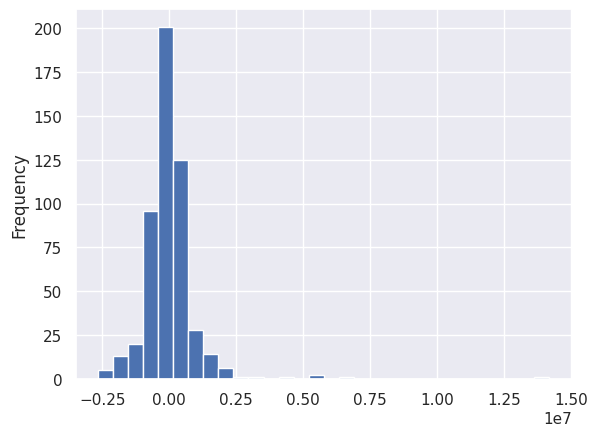

In [1787]:
predictions.error.plot(kind='hist', bins=30)

In [1788]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print(f'MAE: {mae:.2f}')

MAE: 592398.59


In [1789]:
import statsmodels.api as sm

X_train_ols = X_train.copy()
X_train_ols = X_train_ols.values
X_train_ols = sm.add_constant(X_train_ols)
X_train_ols

array([[    1.,  2013., 64000., ...,     1.,     1.,     0.],
       [    1.,  2014., 78000., ...,     1.,     0.,     1.],
       [    1.,  2022.,  5500., ...,     1.,     0.,     0.],
       ...,
       [    1.,  2013., 62000., ...,     1.,     1.,     0.],
       [    1.,  2017., 51292., ...,     1.,     1.,     0.],
       [    1.,  2017., 96095., ...,     1.,     0.,     1.]])

In [1790]:
ols = sm.OLS(endog=y_train, exog=X_train_ols).fit()
predictors = ['const'] + list(X_train.columns)
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     79.62
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        03:44:23   Log-Likelihood:                -23689.
No. Observations:                1544   AIC:                         4.753e+04
Df Residuals:                    1469   BIC:                         4.793e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.33